<a href="https://colab.research.google.com/github/eooloyede/Data-Analytics/blob/main/SentimentAnalysisECommerse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the File Containing the Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Women_s_E-Commerce_Clothing_Reviews_1594_1.csv', delimiter=';')

In [2]:
df.head(5)

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing.ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review.Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended.IND          23486 non-null  int64 
 7   Positive.Feedback.Count  23486 non-null  int64 
 8   Division.Name            23472 non-null  object
 9   Department.Name          23472 non-null  object
 10  Class.Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

**Renaming The Columns Properly**

In [5]:
df = df.rename(columns={'Clothing.ID': 'ClothingID', 'Review.Text': 'Review', 'Recommended.IND':'RecommendedIND',\
                        'Positive.Feedback.Count':'FeedbackCount', 'Division.Name': 'DivisionName',\
                        'Department.Name': 'DepartmentName', 'Class.Name': 'ClassName'})

In [6]:
df.head()

,ClothingID,Age,Title,Review,Rating,RecommendedIND,FeedbackCount,DivisionName,DepartmentName,ClassName
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The column Clothing ID may not be relevant for the aim of the project, so it will be dropped.

In [7]:
df.drop(columns='ClothingID', axis=1, inplace=True)

The Review will be classified as Positive, Negative and Neutral. Ratings below 3 will be negative, above will be positive and 3 will be neutral

In [8]:
def rating_classification(value):
    if value > 3:
        return 'positive'
    elif value < 3:
        return 'negative'
    else:
        return 'neutral'

In [9]:
df['sentiment'] = df['Rating'].apply(rating_classification)

In [10]:
df.head()

,Age,Title,Review,Rating,RecommendedIND,FeedbackCount,DivisionName,DepartmentName,ClassName,sentiment
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive


In [11]:
few_comments = []

few_comments.append(df.iloc[0:10,2])

In [12]:
few_comments

[0    Absolutely wonderful - silky and sexy and comf...
 1    Love this dress!  it's sooo pretty.  i happene...
 2    I had such high hopes for this dress and reall...
 3    I love, love, love this jumpsuit. it's fun, fl...
 4    This shirt is very flattering to all due to th...
 5    I love tracy reese dresses, but this one is no...
 6    I aded this in my basket at hte last mintue to...
 7    I ordered this in carbon for store pick up, an...
 8    I love this dress. i usually get an xs but it ...
 9    I'm 5"5' and 125 lbs. i ordered the s petite t...
 Name: Review, dtype: object]

In [13]:
df.isnull().sum()

Age                  0
Title             3810
Review             845
Rating               0
RecommendedIND       0
FeedbackCount        0
DivisionName        14
DepartmentName      14
ClassName           14
sentiment            0
dtype: int64

The column title has 3810 missing values, this column will be removed

In [14]:
df.shape

(23486, 10)

In [15]:
df.drop(columns='Title', axis = 1, inplace=True)

In [16]:
df.isna().sum()

Age                 0
Review            845
Rating              0
RecommendedIND      0
FeedbackCount       0
DivisionName       14
DepartmentName     14
ClassName          14
sentiment           0
dtype: int64

The rows with Na on Review will be deleted since there is no means to retrive these comments

In [17]:
df.dropna(subset=['Review'], axis = 0, inplace=True)

In [18]:
df.isnull().sum()

Age                0
Review             0
Rating             0
RecommendedIND     0
FeedbackCount      0
DivisionName      13
DepartmentName    13
ClassName         13
sentiment          0
dtype: int64

In [19]:
df.shape

(22641, 9)

For the Machine learning, we only need the Review Column and the Sentiment column. Therefore, these columns will be extracted out. However, all the columns will be used for EDA

In [20]:
df_ML = df[['Review', 'sentiment']]

In [21]:
df_ML.shape

(22641, 2)

The text preprocessing for NLP will be done later

In [22]:
df.dropna(axis=0, inplace=True)

In [23]:
df.isnull().sum()

Age               0
Review            0
Rating            0
RecommendedIND    0
FeedbackCount     0
DivisionName      0
DepartmentName    0
ClassName         0
sentiment         0
dtype: int64

In [24]:
df.isna().sum()

Age               0
Review            0
Rating            0
RecommendedIND    0
FeedbackCount     0
DivisionName      0
DepartmentName    0
ClassName         0
sentiment         0
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df['Rating'].value_counts()

Rating
5    12527
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

<BarContainer object of 5 artists>

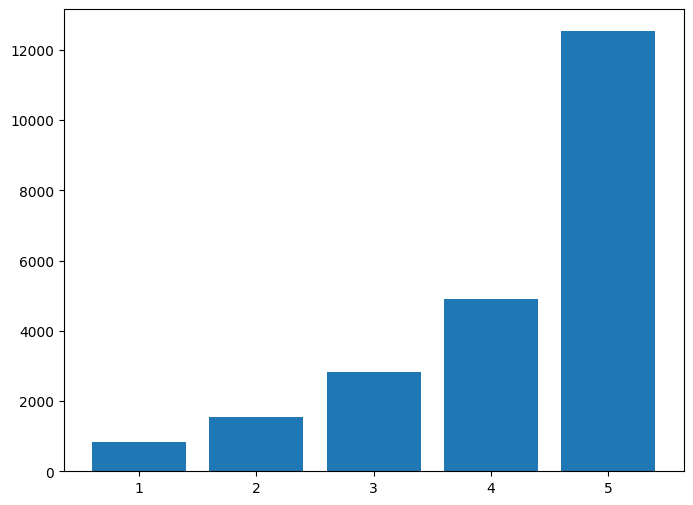

In [27]:
plt.figure(figsize=(8,6))
plt.bar(df['Rating'].value_counts().index, df['Rating'].value_counts().values)

There are more positive reviews than negative ones, therefore, the brand has good reputation with consumers

In [28]:
df['Age'].describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Buyers by Age')

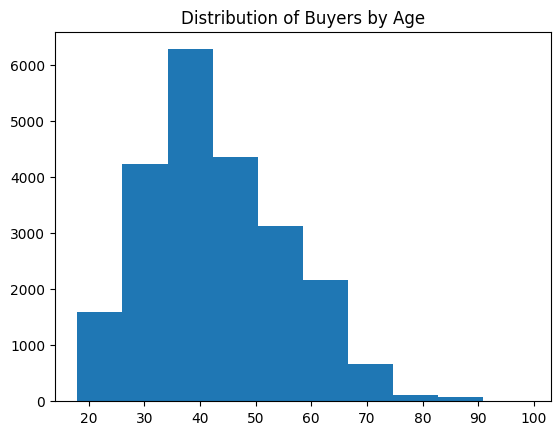

In [29]:
plt.hist(df['Age'])
plt.title('Distribution of Buyers by Age')

The histogram is skewed to the left, therefore, the brand has more people from age of 30-60 patronising them

In [30]:
#Creating Age Range
def age_range(age):
    if 11 <= age <= 20:
        return '11-20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    elif 61 <= age <= 70:
        return '61-70'
    else:
        return 'Above 70'

In [31]:
df['AgeRange'] = df['Age'].apply(age_range)

In [32]:
df.head()

,Age,Review,Rating,RecommendedIND,FeedbackCount,DivisionName,DepartmentName,ClassName,sentiment,AgeRange
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive,31-40
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive,31-40
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral,51-60
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive,41-50
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive,41-50


([<matplotlib.patches.Wedge at 0x7cc17417f5e0>,
 [Text(0.5500881782720687, 0.9525770289721021, '31-40'),
  Text(-1.0641475835655239, 0.278549673113534, '51-60'),
  Text(-0.5372101130472463, -0.9598985854973248, '41-50'),
  Text(0.46974973206265686, -0.9946533010185319, '21-30'),
  Text(1.0024040605276425, -0.4529747227359318, '61-70'),
  Text(1.0952017402258367, -0.102631126887993, 'Above 70'),
  Text(1.099764644126547, -0.022753626726516967, '11-20')])

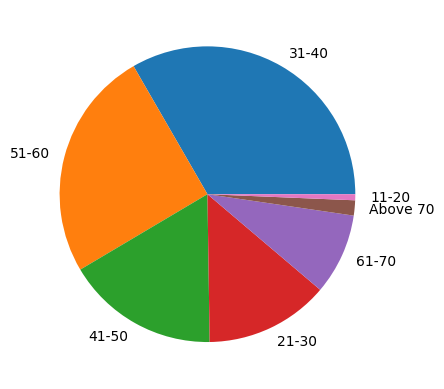

In [33]:
pielabel = df["AgeRange"].unique()
plt.pie(df["AgeRange"].value_counts(), labels=pielabel)

The Brand sure has more buyers between the age range 31 to 60

<BarContainer object of 3 artists>

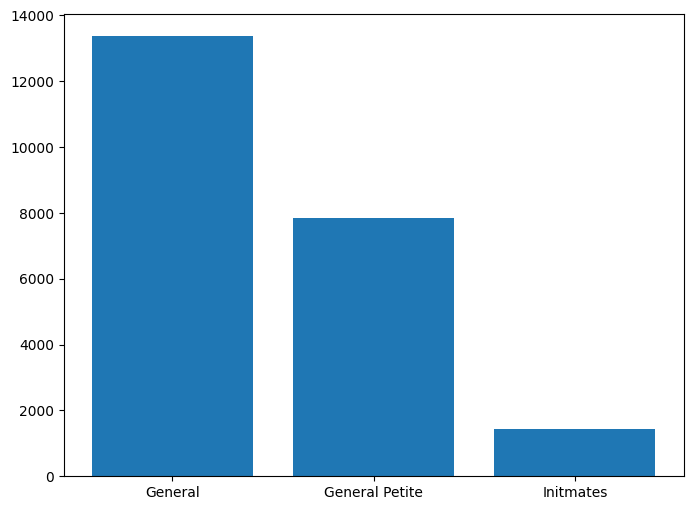

In [34]:
plt.figure(figsize=(8,6))
plt.bar(df['DivisionName'].value_counts().index, df['DivisionName'].value_counts().values)

General Division has more patronage count, followed by General petite Division and Lastly Intimates Division

**Moving to the NLP**

In [35]:
df_ML

,Review,sentiment
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
...,...,...
23481,I was very happy to snag this dress at such a ...,positive
23482,"It reminds me of maternity clothes. soft, stre...",neutral
23483,"This fit well, but the top was very see throug...",neutral
23484,I bought this dress for a wedding i have this ...,neutral


In [36]:
reviews = []

reviews.append(df_ML.iloc[:,0])

In [37]:
reviews

[0        Absolutely wonderful - silky and sexy and comf...
 1        Love this dress!  it's sooo pretty.  i happene...
 2        I had such high hopes for this dress and reall...
 3        I love, love, love this jumpsuit. it's fun, fl...
 4        This shirt is very flattering to all due to th...
                                ...                        
 23481    I was very happy to snag this dress at such a ...
 23482    It reminds me of maternity clothes. soft, stre...
 23483    This fit well, but the top was very see throug...
 23484    I bought this dress for a wedding i have this ...
 23485    This dress in a lovely platinum is feminine an...
 Name: Review, Length: 22641, dtype: object]

The reviews has been extracted into a list. Now, we have to deal with stop words

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

First, remove stop words and then we convert all text to lower case

In [42]:
df_ML['Review'] = df_ML['Review'].str.lower()

<ipython-input-42-f30bffb292f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Review'] = df_ML['Review'].str.lower()


In [43]:
df_ML

,Review,sentiment
0,absolutely wonderful - silky and sexy and comf...,positive
1,love this dress! it's sooo pretty. i happene...,positive
2,i had such high hopes for this dress and reall...,neutral
3,"i love, love, love this jumpsuit. it's fun, fl...",positive
4,this shirt is very flattering to all due to th...,positive
...,...,...
23481,i was very happy to snag this dress at such a ...,positive
23482,"it reminds me of maternity clothes. soft, stre...",neutral
23483,"this fit well, but the top was very see throug...",neutral
23484,i bought this dress for a wedding i have this ...,neutral


Special Characters to be removed

In [44]:
# prompt: remove special characters from the column Review of df_ML

import re
df_ML['Review'] = df_ML['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df_ML.head()


<ipython-input-44-d51c4eefbb28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Review'] = df_ML['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


,Review,sentiment
0,absolutely wonderful silky and sexy and comfo...,positive
1,love this dress its sooo pretty i happened t...,positive
2,i had such high hopes for this dress and reall...,neutral
3,i love love love this jumpsuit its fun flirty ...,positive
4,this shirt is very flattering to all due to th...,positive


To remove stop words, We must be careful to ensure vital words like "Not" that can change the sentiment of a review is not removed. For instance, review like "I am not happy" and "I am happy" does not mean same thing but if stop word removal is not done carefully, the two sentences will be processed to same thing

In [45]:
stop_words = set(stopwords.words('english')) - {'not'}

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df_ML['Review'] = df_ML['Review'].apply(remove_stopwords)

<ipython-input-45-83e5993cfa76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Review'] = df_ML['Review'].apply(remove_stopwords)


In [46]:
df_ML.head()

,Review,sentiment
0,absolutely wonderful silky sexy comfortable,positive
1,love dress sooo pretty happened find store im ...,positive
2,high hopes dress really wanted work initially ...,neutral
3,love love love jumpsuit fun flirty fabulous ev...,positive
4,shirt flattering due adjustable front tie perf...,positive


Visualising the Word Cloud

In [47]:
pip install wordcloud matplotlib

In [48]:
text = ' '.join(df_ML['Review'])

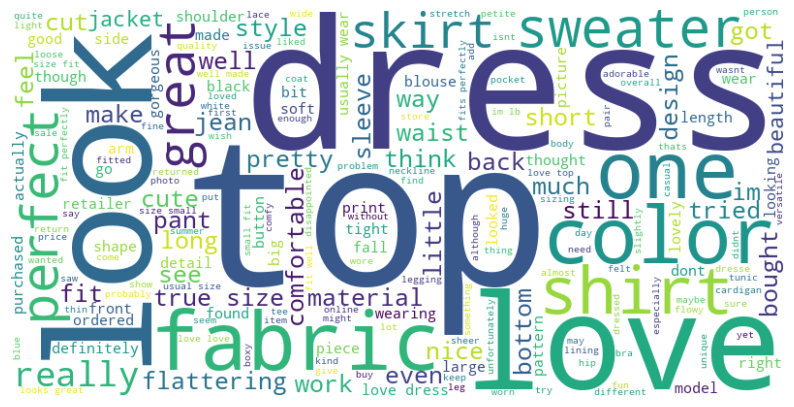

In [49]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word cloud.png')
plt.show()

From the world cloud, there are more positive words repeated as shown. The word "love" is very big showing how much the review contains the word love. Words like flattering,  comfortable, beautiful are very boldly written.

Applying stemming to reduce words to their base word

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def apply_stemming(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming function to 'Review' column
df_ML['Review'] = df_ML['Review'].apply(apply_stemming)

For this project, lemmanisation will be used instead of stemming to reduce words to their base form

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return ' '.join(lemmatized_tokens)

df_ML['Review'] = df_ML['Review'].apply(lemmatize_text)

<ipython-input-51-c7e5f7a19011>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Review'] = df_ML['Review'].apply(lemmatize_text)


In [53]:
# prompt: lemmatize text in df_ML['Review']

nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return ' '.join(lemmatized_tokens)

df_ML['Review'] = df_ML['Review'].apply(lemmatize_text)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-53-a32ad160bd83>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Review'] = df_ML['Review'].apply(lemmatize_text)


In [54]:
df_ML.head()

,Review,sentiment
0,absolutely wonderful silky sexy comfortable,positive
1,love dress sooo pretty happen find store im gl...,positive
2,high hope dress really want work initially ord...,neutral
3,love love love jumpsuit fun flirty fabulous ev...,positive
4,shirt flatter due adjustable front tie perfect...,positive


In [55]:
# Concatenate all reviews into a single string
text_lemma = ' '.join(df_ML['Review'])

Lets view the word cloud after stemming

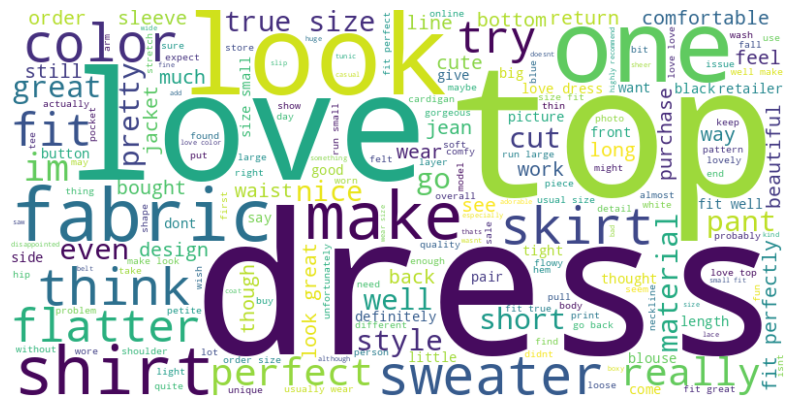

In [56]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_lemma)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word cloud afterLemma.png')
plt.show()

The next thing will be to use tokenizer to convert the words into token

In [ ]:
df_ML

,Review,sentiment
0,absolutely wonderful - silky sexy comfortable,positive
1,love dress ! 's sooo pretty . happen find stor...,positive
2,high hope dress really want work . initially o...,neutral
3,"love , love , love jumpsuit . 's fun , flirty ...",positive
4,shirt flatter due adjustable front tie . perfe...,positive
...,...,...
23481,happy snag dress great price ! 's easy slip fl...,positive
23482,"reminds maternity clothes . soft , stretchy , ...",neutral
23483,"fit well , top see . never would work . 'm gla...",neutral
23484,"bought dress wedding summer , 's cute . unfort...",neutral


Though stemming is useful but lemmanisation is better as it reduces words to its base english form

In [57]:
#First, We will encode the sentiment column to 1, 0 and -1 for positive, neutral and negative

df_ML['sentiment'].replace({'positive':1, 'neutral':0, 'negative':-1}, inplace=True)

<ipython-input-57-e1ade644ff73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['sentiment'].replace({'positive':1, 'neutral':0, 'negative':-1}, inplace=True)


In [58]:
df_ML.head()

,Review,sentiment
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happen find store im gl...,1
2,high hope dress really want work initially ord...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flatter due adjustable front tie perfect...,1


In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [60]:
df_ML['sentiment'].values

array([1, 1, 0, ..., 0, 0, 1])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_ML['Review'], df_ML['sentiment'].values, test_size=0.2)

Convert Sentences to Sequences

In [62]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

Get the Word to Integer Mapping

In [63]:
word2idx = tokenizer.word_index
uniqueToken = len(word2idx)
print(f'There are {uniqueToken} unique tokens found')

There are 14557 unique tokens found


Applying Padding to Ensure all the rows are in the same length

In [64]:
x_train = pad_sequences(sequences_train)

In [65]:
x_train.shape

(18112, 64)

In [66]:
T = x_train.shape[1]

Now, we ensure the x_test maximum length is padded to shape of x_train

In [67]:
x_test = pad_sequences(sequences_test, maxlen=T)

In [68]:
x_test.shape

(4529, 64)

Now, both x_train and x_test are in the same shape and ready to be fed into any machine learning model.

In [70]:
x_train

array([[   0,    0,    0, ...,   31,  225, 6479],
       [   0,    0,    0, ..., 1369,  156, 1794],
       [   0,    0,    0, ...,  285,   84,   54],
       ...,
       [   0,    0,    0, ..., 1650, 2575,  606],
       [   0,    0,    0, ...,  128,  134,   20],
       [   0,    0,    0, ...,   82, 1042,    7]], dtype=int32)

In [73]:
x_test

array([[   0,    0,    0, ..., 3107, 1568,  760],
       [   0,    0,    0, ..., 1018,    5,  146],
       [   0,    0,    0, ..., 1528,   49, 1083],
       ...,
       [   0,    0,    0, ..., 1535,  331,  395],
       [   0,    0,    0, ...,   19,   35,    5],
       [   0,    0,    0, ...,   26,   47,  308]], dtype=int32)

In [74]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

Save the Preprocessed data into NPZ for easy usage for machine learning

In [79]:
np.savez('sentiment_analysis_train', inputs = x_train, targets=y_train)
np.savez('sentiment_analysis_test', inputs = x_test, targets=y_test)